### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
os.environ["OMP_NUM_THREADS"] = '1'


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from pandas.plotting import table
import dataframe_image as dfi

from pathlib import Path
import pickle



### Selecting Path

In [2]:
def load_data(dataset, classifier):
    # Load dataset and change working directory
    path = Path(f'E:/Eighth Semester/EEE Capstone/8th Semester/{dataset}/{classifier}')
    os.chdir(path)

    df_encoded = pd.read_csv('df_encoded.csv')
    return df_encoded

def creating_cluster_data(df_encoded, classifier):
    
    # Run evaluation and save results
    with open(f'{classifier}_selected_features.pkl', 'rb') as f:
        corr_features, chi_sq_features, seq_fea_sel_features, rfe_cv_features = pickle.load(f)
    
    X = df_encoded[df_encoded['churn'] == 1].copy()
    # Select the relevant features for clustering
    X = X[seq_fea_sel_features]
    
    return X

def main():

    dataset = input("Enter dataset name: ")
    classifier = input("Enter classifier name: ")
    print("Dataset: ", dataset)
    print("Classifier: ", classifier)

    df_encoded = load_data(dataset, classifier)
    X = creating_cluster_data(df_encoded, classifier)

    # Normalize data
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    # Get user input for the clustering algorithm
    algorithm = input("Enter clustering algorithm (KM/GM/DB): ")

    print("Clustering algorithm: ", algorithm)

    if classifier == 'BRF':
        if algorithm == 'KM':
            model = KMeans(n_clusters=2, random_state=42)
        elif algorithm == 'GM':
            model = GaussianMixture(n_components=2, random_state=42)
        elif algorithm == 'DB':
            model = DBSCAN(eps=3.5, min_samples=5)
        else:
            print("Invalid algorithm choice. Please enter either 'KM', 'GM', or 'DB'.")
            return
    elif classifier == 'XGB':
        if algorithm == 'KM':
            model = KMeans(n_clusters=4, random_state=42)
        elif algorithm == 'GM':
            model = GaussianMixture(n_components=2, random_state=42)
        elif algorithm == 'DB':
            model = DBSCAN(eps=3.5, min_samples=5)
        else:
            print("Invalid algorithm choice. Please enter either 'KM', 'GM', or 'DB'.")
            return


    model.fit(X_normalized)

    # Get labels. For DB, labels_ attribute is used. For KM and GMMixture, predict method is used.
    labels = model.labels_ if algorithm == 'DB' else model.predict(X_normalized)

    # Add the cluster labels to your dataframe
    X['cluster'] = labels

    # Count the number of customers in each cluster
    cluster_counts = X['cluster'].value_counts()

    # Now let's categorize clusters
    # We will assign 3 to the largest group, 2 to the next, and so on.
    # Get unique clusters
    clusters = sorted(set(labels))
    print(clusters)

    # Sort clusters by size
    clusters_sorted_by_size = sorted(clusters, key=lambda x: -cluster_counts[x])

    # Determine the number of unique clusters
    
    num_clusters = len(clusters_sorted_by_size)

    # Create a mapping from old cluster labels to new ones
    mapping = {cluster: num_clusters - i for i, cluster in enumerate(clusters_sorted_by_size)}

    # Update clusters
    X['cluster'] = X['cluster'].map(mapping)

    # Recalculate the counts for the updated cluster labels
    cluster_counts = X['cluster'].value_counts()
    print(cluster_counts)

    cluster_percentage = cluster_counts / cluster_counts.sum() * 100

    # Define colors
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

    

    # Set the global font to be larger
    plt.rcParams['font.size'] = 18

    # Plot pie chart
    plt.figure(figsize=(12, 12))
    plt.pie(cluster_percentage, labels=cluster_percentage.index, colors=colors, autopct='%1.1f%%')
    plt.title('Percentage of Churn Customers in Each Cluster')
    # To ensure the entire plot is saved
    plt.tight_layout()
    plt.savefig(f'{algorithm}_cluster_pie_{classifier}.png',  bbox_inches='tight', dpi = 300)
    plt.savefig(f'{algorithm}_cluster_pie_{classifier}.eps',  bbox_inches='tight')
    plt.savefig(f'{algorithm}_cluster_pie_{classifier}.pdf',  bbox_inches='tight')
    plt.show()

    # Plot heatmap to show feature dependency
    plt.figure(figsize=(20, 10))
    sns.heatmap(X.corr(), annot=True, fmt=".2f")
    
    # To ensure the entire plot is saved
    plt.tight_layout()

    plt.savefig(f'{algorithm}_cluster_heatmap_{classifier}.png', bbox_inches='tight', dpi=300, pad_inches=0.1)
    plt.savefig(f'{algorithm}_cluster_heatmap_{classifier}.eps', bbox_inches='tight', pad_inches=0.1)
    plt.savefig(f'{algorithm}_cluster_heatmap_{classifier}.pdf', bbox_inches='tight', pad_inches=0.1)
    plt.show()



    X.to_csv(f'{algorithm}_clustered_{classifier}.csv', index=False)

Dataset:  IBM Watson
Classifier:  BRF
Clustering algorithm:  KM


e:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0, 1]
2    1413
1     456
Name: cluster, dtype: int64


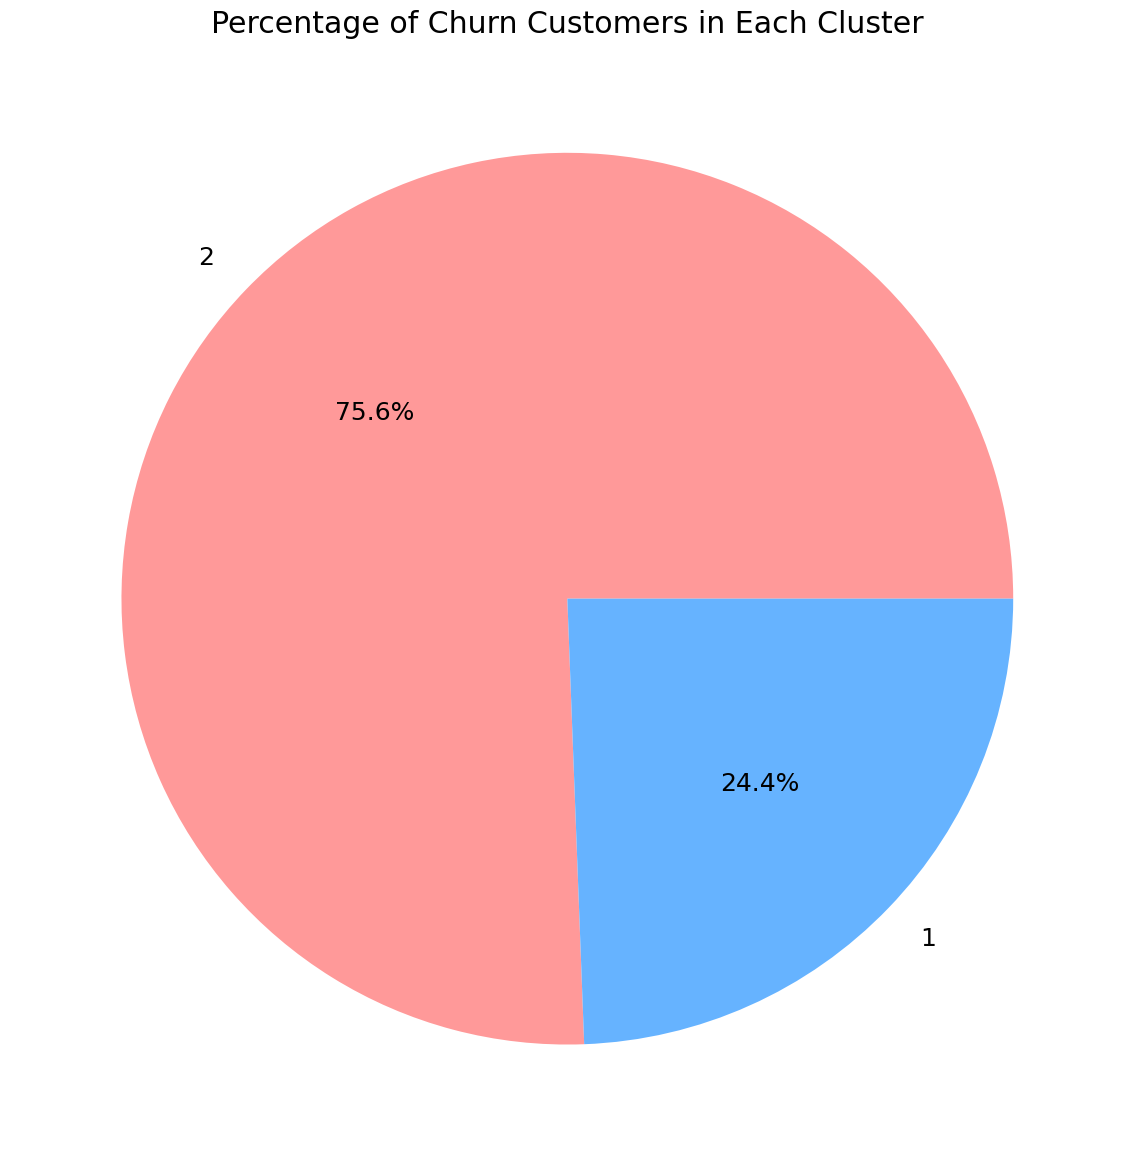

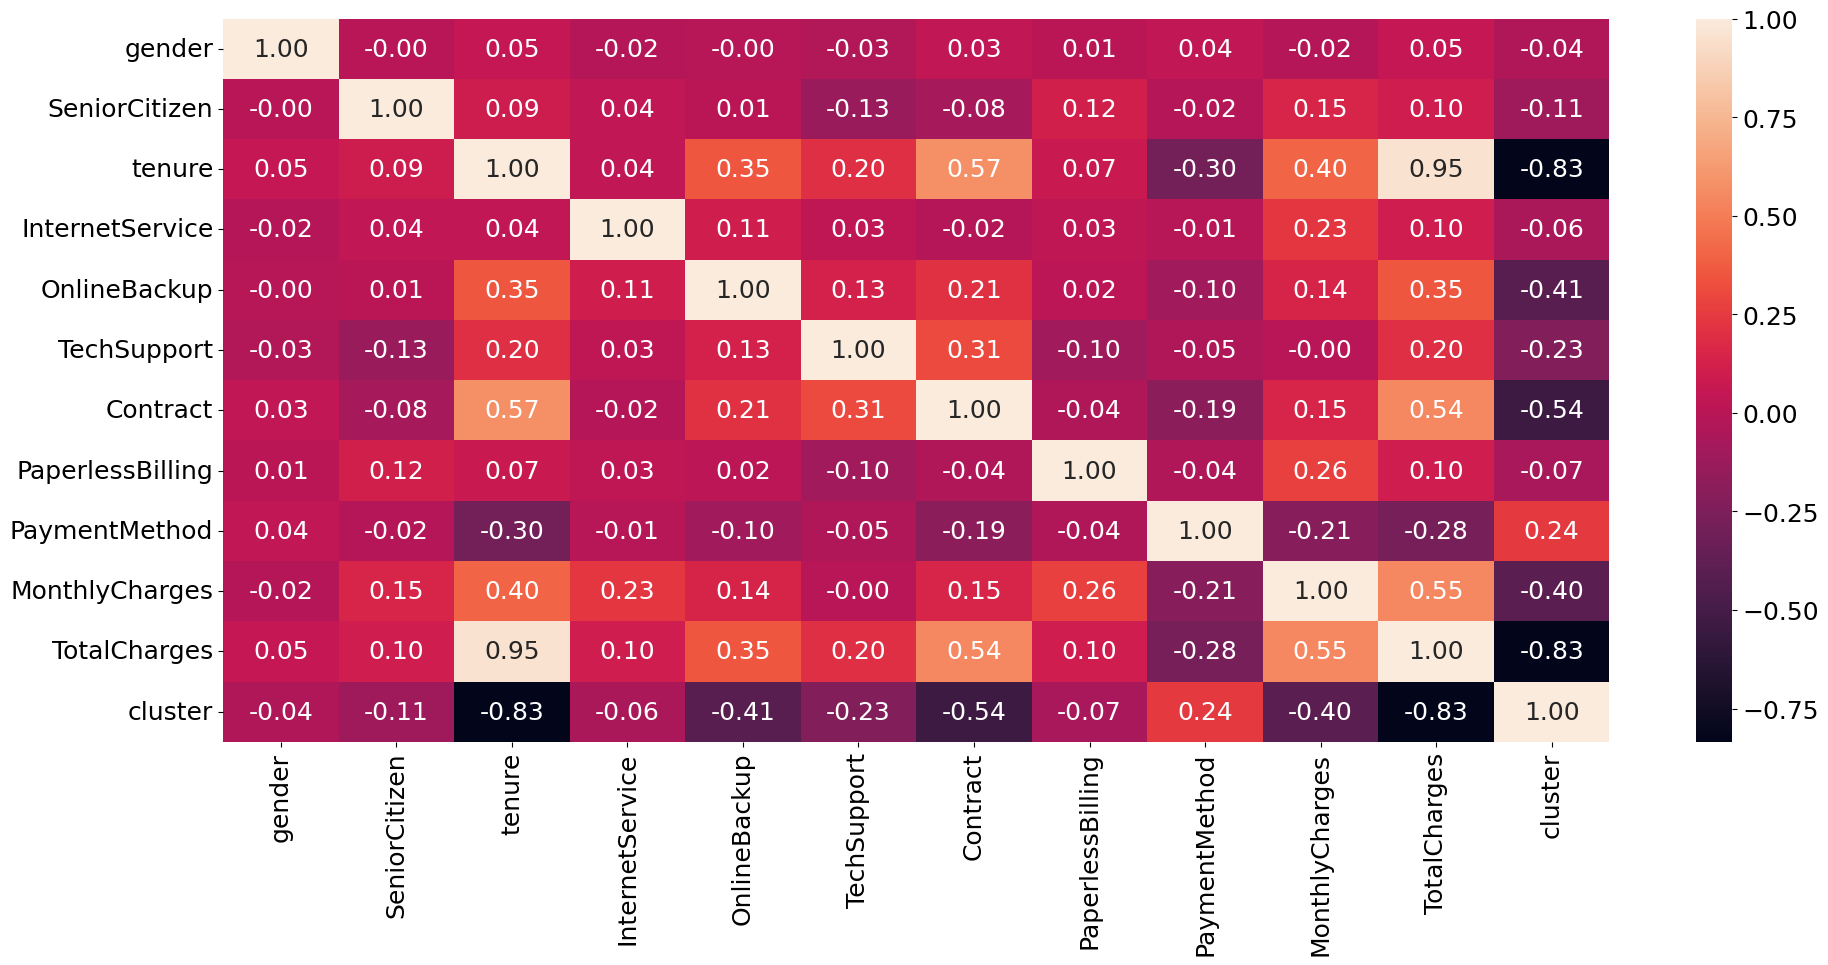

In [4]:
if __name__ == "__main__":
    main()

In [16]:
dataset = input("Enter dataset name: ")
classifier = input("Enter classifier name: ")
print("Dataset: ", dataset)
print("Classifier: ", classifier)

df_encoded = load_data(dataset, classifier)
X = creating_cluster_data(df_encoded, classifier)

# Normalize data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

Dataset:  Orange
Classifier:  XGB


[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [00:00<00:00, 180.62it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [4].
[clusteval] >INFO> Fin.


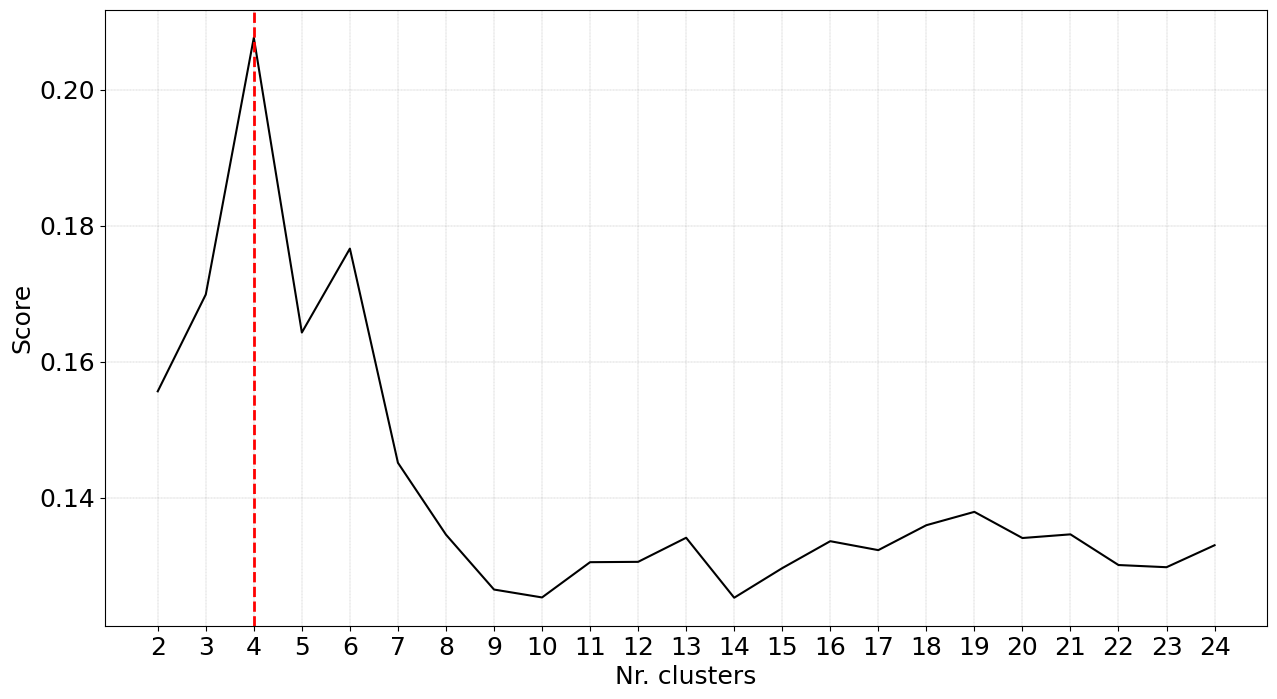

[clusteval] >INFO> Retrieving input data set.
[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.
[clusteval] >INFO> Estimated number of n_clusters: 4, average silhouette_score=0.198


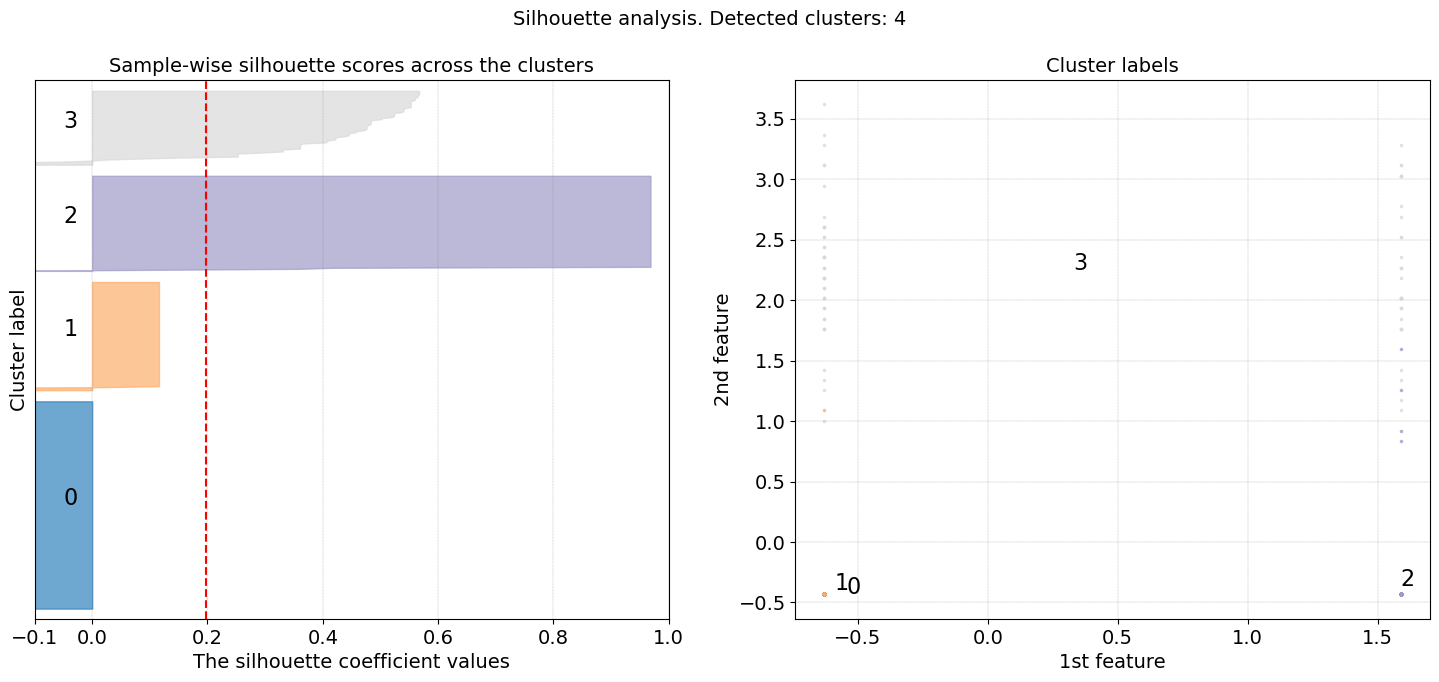

[clusteval] >INFO> Retrieving input data set.
[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.
[clusteval] >INFO> Retrieving input data set.
[clusteval] >INFO> Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=22.008. Be patient now..
[clusteval] >INFO> Compute cluster labels.


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [85.0, 85.0, 103.75, 103.75],
  [75.0, 75.0, 94.375, 94.375],
  [52.5, 52.5, 84.6875, 84.6875],
  [13.75, 13.75, 68.59375, 68.59375],
  [135.0, 135.0, 145.0, 145.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [140.0, 140.0, 162.5, 162.5],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [222.5, 222.5, 260.0, 260.0],
  [192.5, 192.5, 241.25, 241.25],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [320.0, 320.0, 342.5, 342.5],
  [375.0, 37

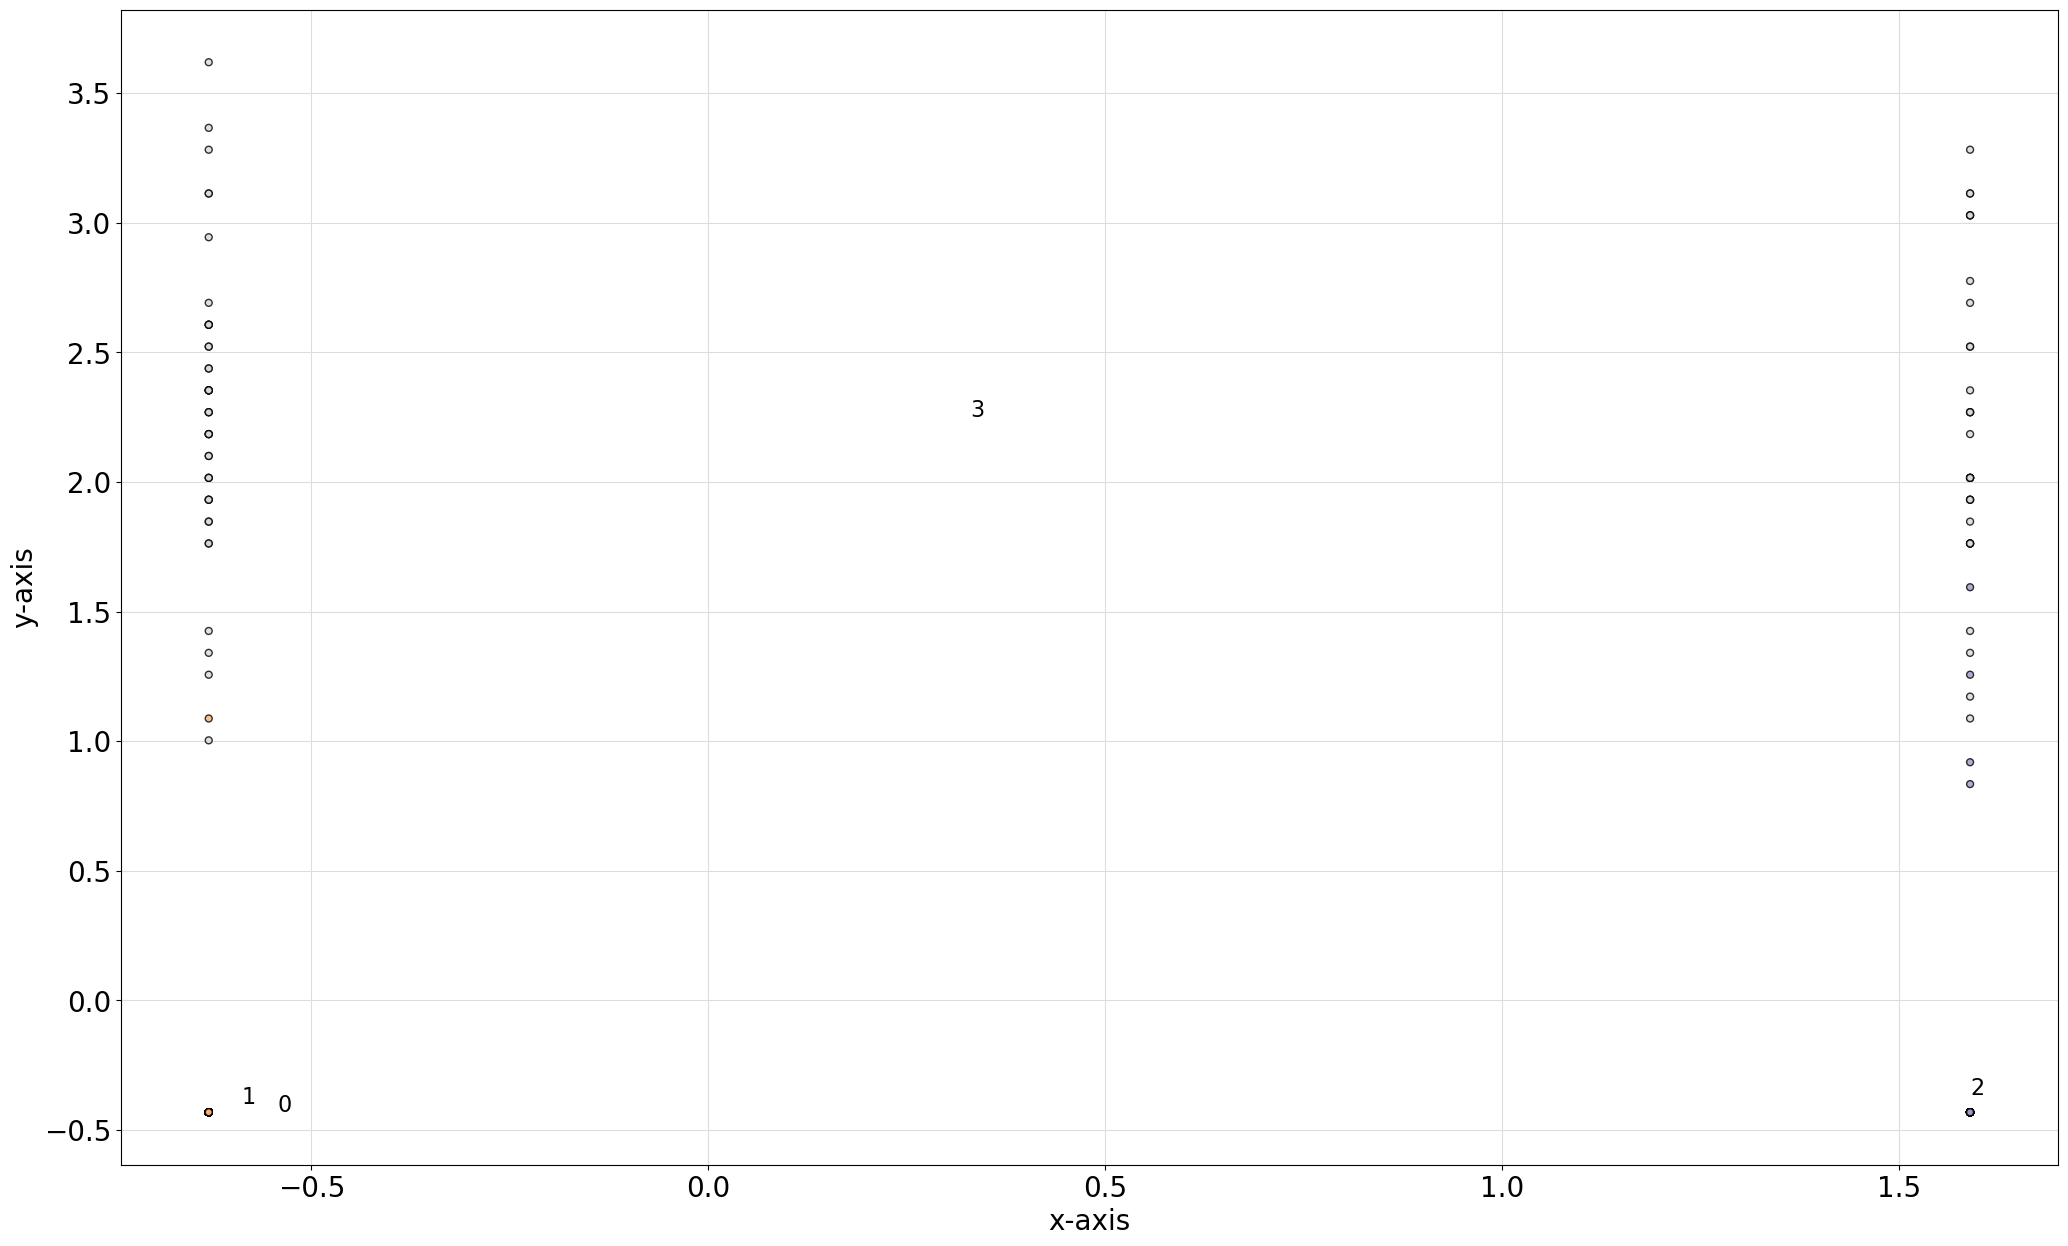

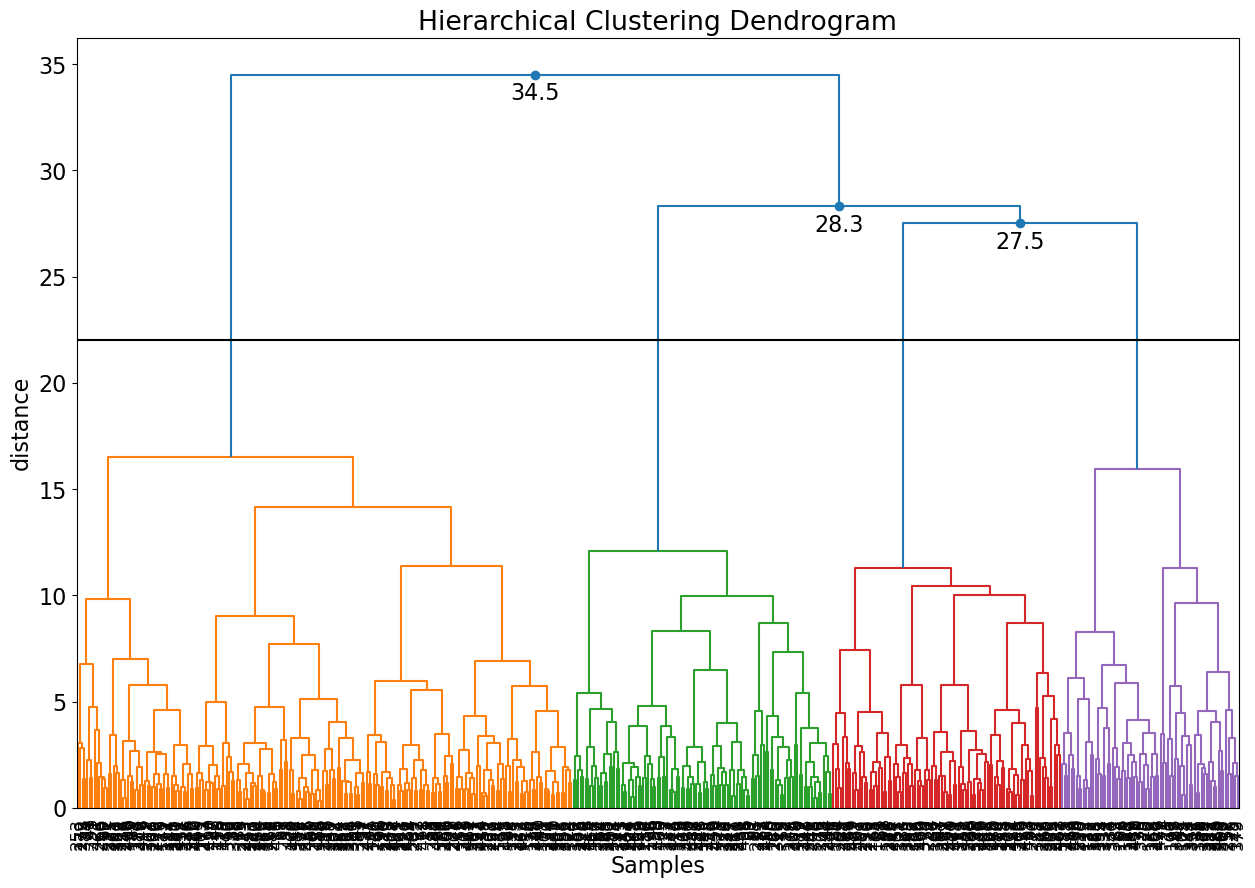

In [23]:
# Initialize
ce = clusteval(evaluate='silhouette')

# Fit
ce.fit(X_normalized)

# Plot
ce.plot()
ce.plot_silhouette()
ce.scatter()
ce.dendrogram()


In [20]:
if __name__ == "__main__":
    main()

Dataset:  Orange
Classifier:  XGB


e:\Anaconda\envs\tensorflow\lib\site-packages\numpy\lib\arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


ValueError: cluster has incorrect input argument [[[-0.62924857 -0.43180325 -1.12894565 ...  0.71676965  0.72047371
   0.95615693]
 [-0.62924857 -0.43180325  1.82783451 ... -1.89943958  1.89743697
   0.95615693]
 [-0.62924857 -0.43180325 -2.09664554 ... -1.79192413  0.72047371
   1.49630173]
 ...
 [ 1.58919711 -0.43180325 -0.97080579 ... -0.35838483 -0.06416846
   0.95615693]
 [-0.62924857 -0.43180325  1.65663723 ...  0.28670786 -0.84881063
   0.95615693]
 [-0.62924857 -0.43180325 -1.28418387 ...  1.039316   -0.45648955
   1.49630173]]].

### Loading Dataset

## Clustering

### KM

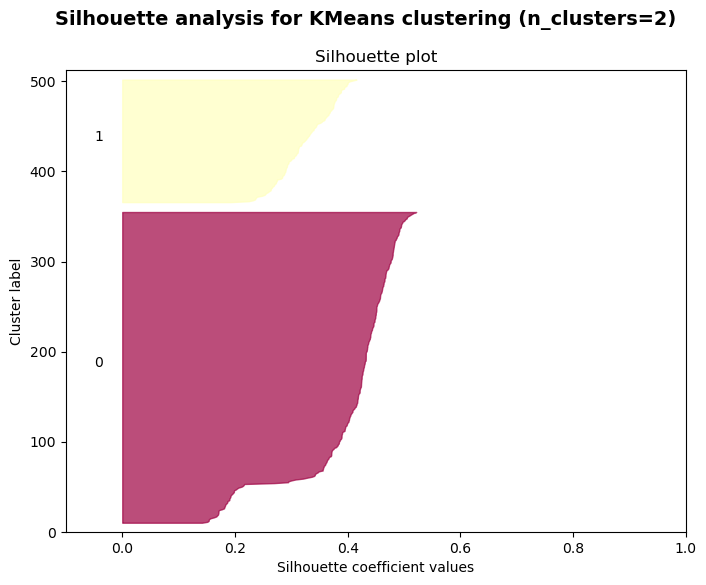

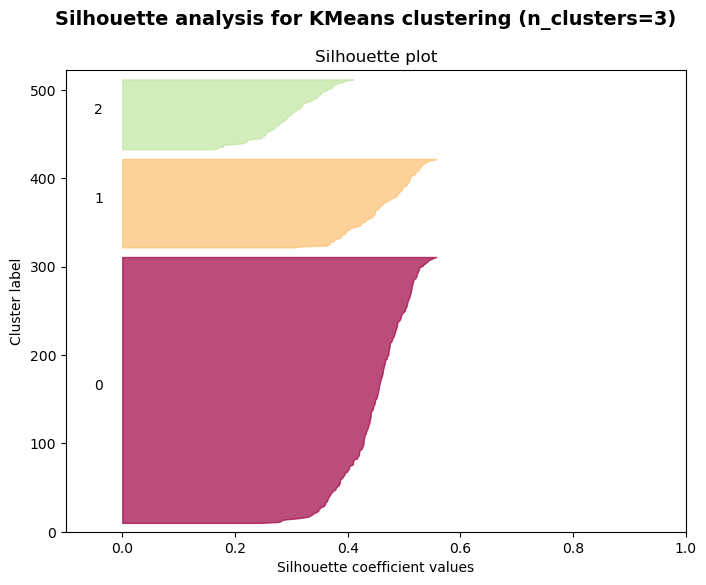

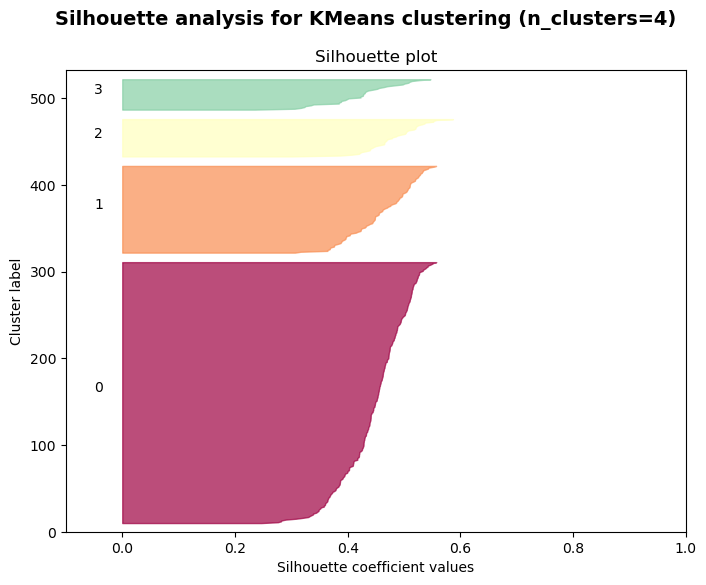

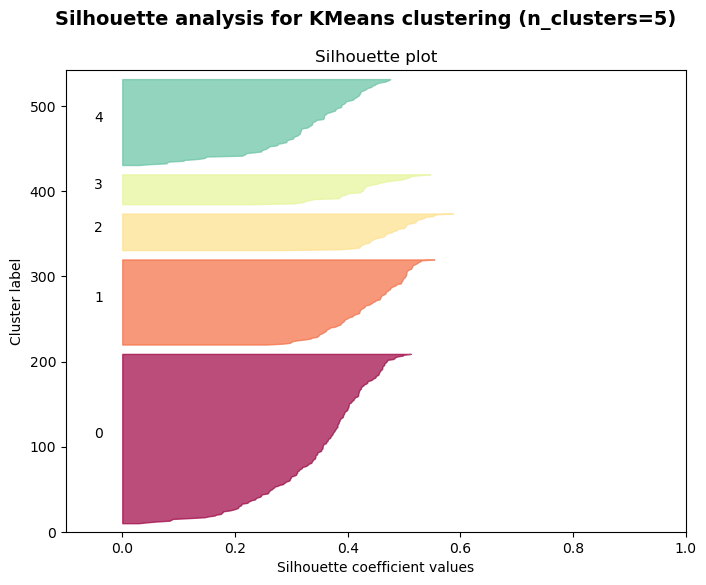

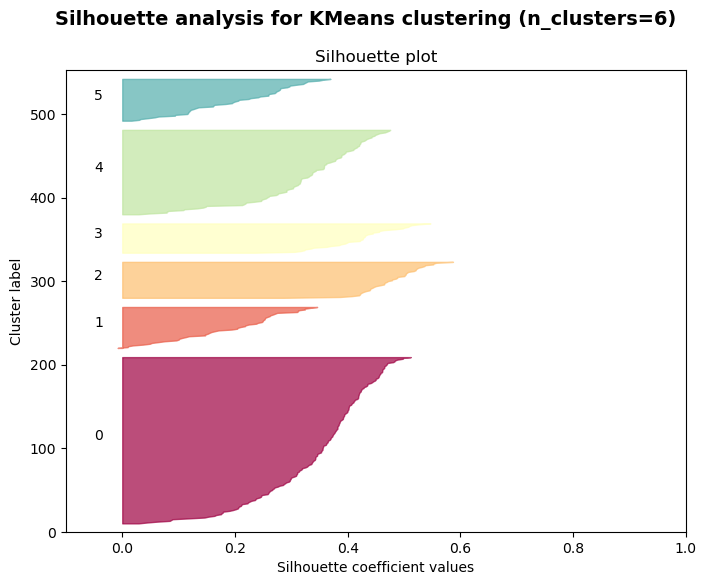

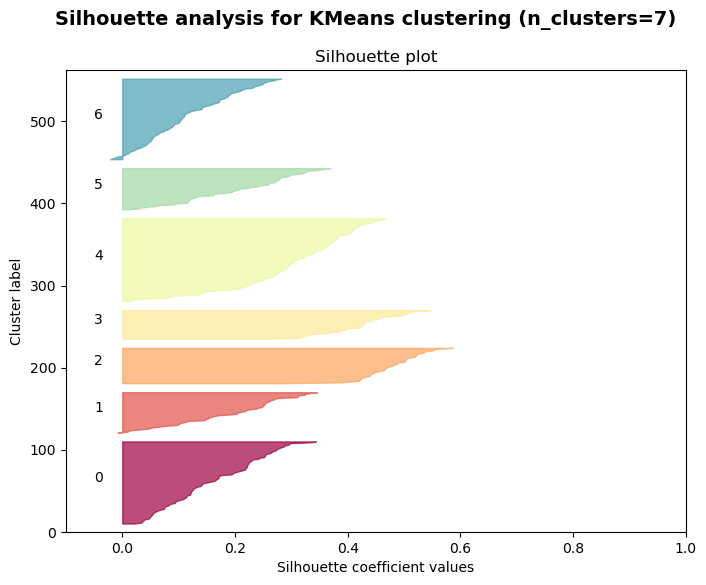

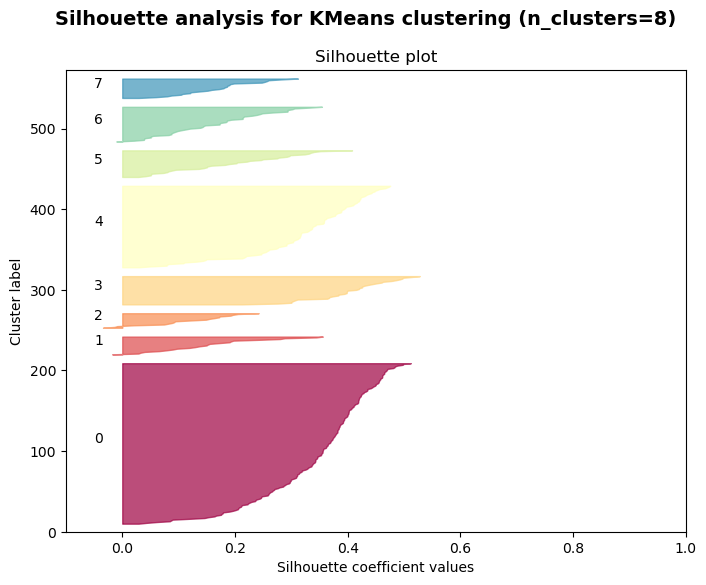

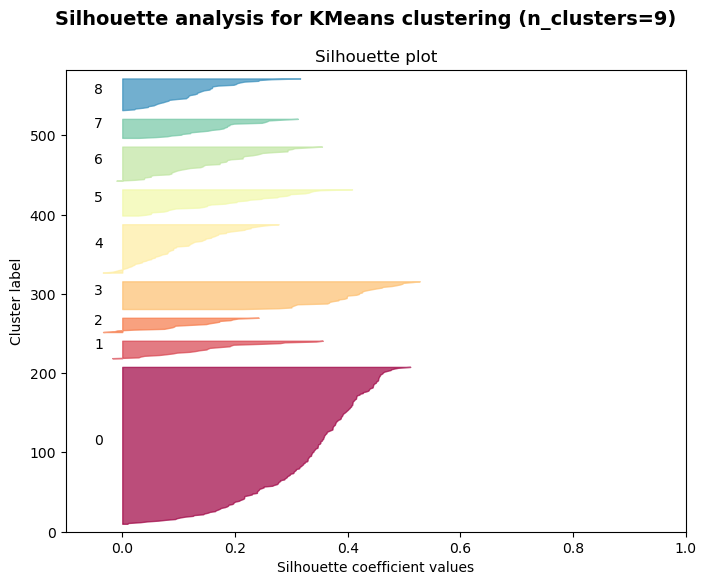

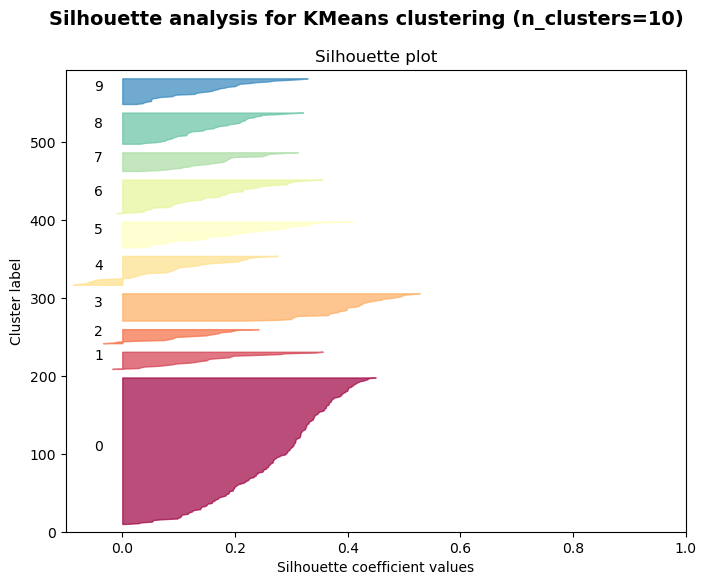

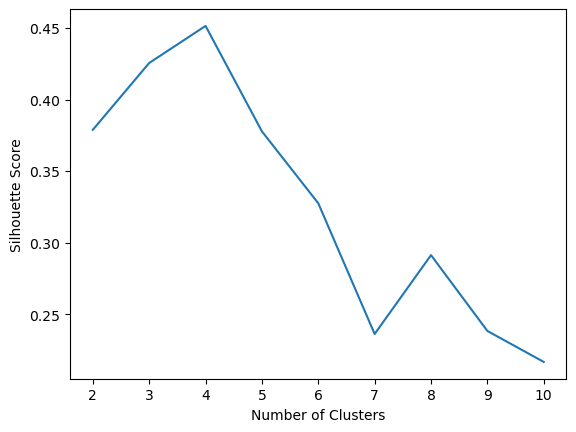

In [13]:

# Determine the optimal number of clusters using silhouette method
silhouette_scores = []
for n_clusters in range(2, 11):
    KM = KM(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = KM.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    # Create the silhouette plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    fig.suptitle(f"Silhouette analysis for KM clustering (n_clusters={n_clusters})", fontsize=14, fontweight='bold')
    
    # Plot the silhouette scores
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.get_cmap('Spectral')(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax.set_title("Silhouette plot")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    plt.show()

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


### GM Mixture

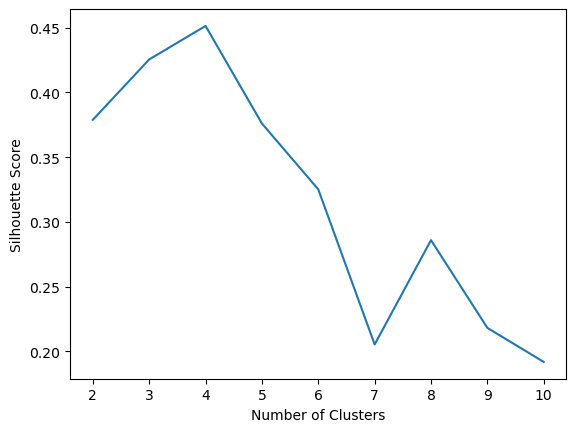

In [14]:
# Select the relevant features for clustering
X = df_churn[seq_fea_sel_features]

# Determine the optimal number of clusters using silhouette method
silhouette_scores = []
for n_clusters in range(2, 11):
    gmm = GMMixture(n_components=n_clusters, random_state=42)
    cluster_labels = gmm.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


### DB

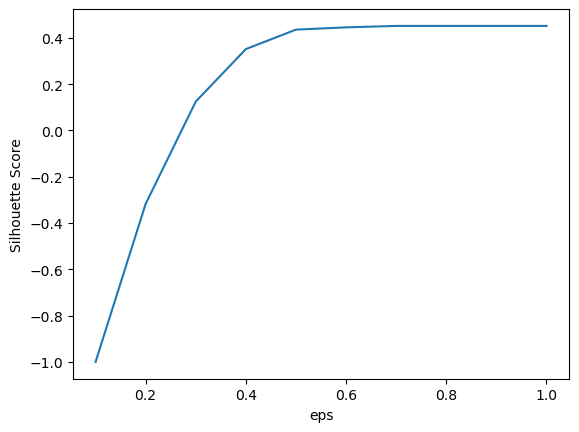

In [15]:
# Select the relevant features for clustering
X = df_churn[seq_fea_sel_features]

# Determine the optimal value for eps using silhouette method
silhouette_scores = []
eps_values = np.arange(0.1, 1.1, 0.1)
for eps in eps_values:
    DB = DB(eps=eps, min_samples=5)
    cluster_labels = DB.fit_predict(X)
    if len(np.unique(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)

# Plot the silhouette scores
plt.plot(eps_values, silhouette_scores)
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.show()
